In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe = pd.read_csv("Zomato data.csv")
print(dataframe.head())

In [21]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [20]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of resturnet')

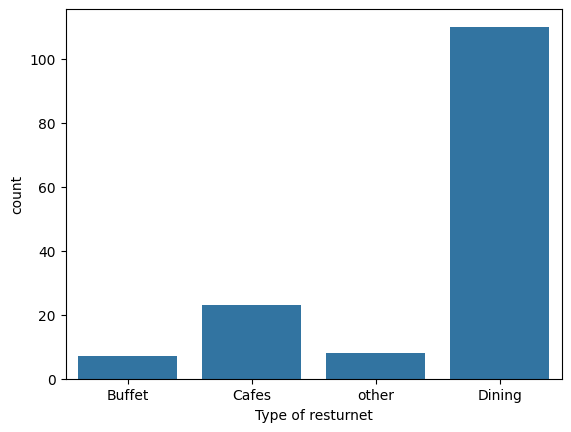

In [19]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Type of resturnet')

**The majority of the restaurants fall into the dining category.**


Text(0, 0.5, 'Votes')

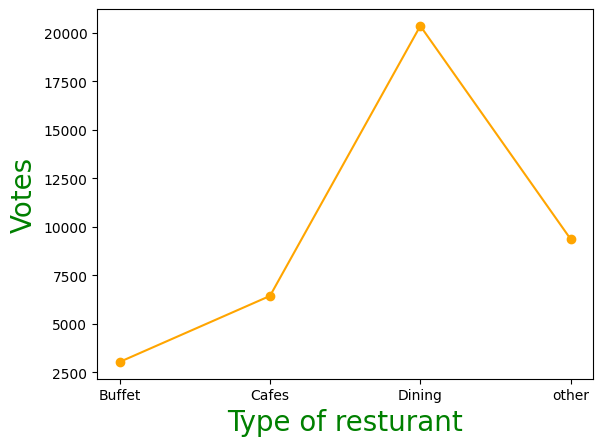

In [18]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result =  pd.DataFrame({'votes':grouped_data})
plt.plot(result,c= 'orange', marker = 'o')
plt.xlabel("Type of resturant",c= 'Green',size=20)
plt.ylabel("Votes",c= 'Green',size = 20)

**Dining restaurants are preferred by a larger number**

In [22]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

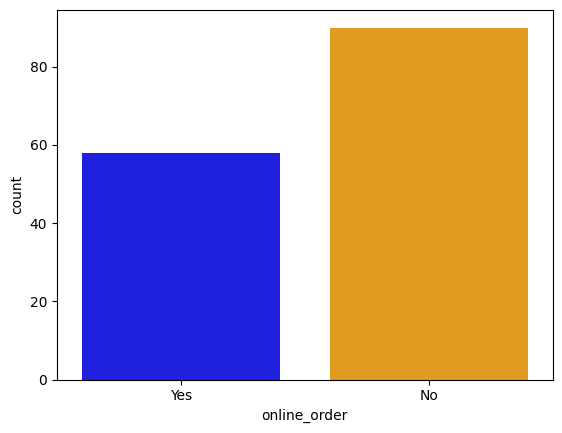

In [30]:
sns.countplot(x='online_order', hue='online_order', data=dataframe, 
              palette=['blue', 'orange'], legend=False)

**This suggests that a majority of the restaurants do not accept online orders.**

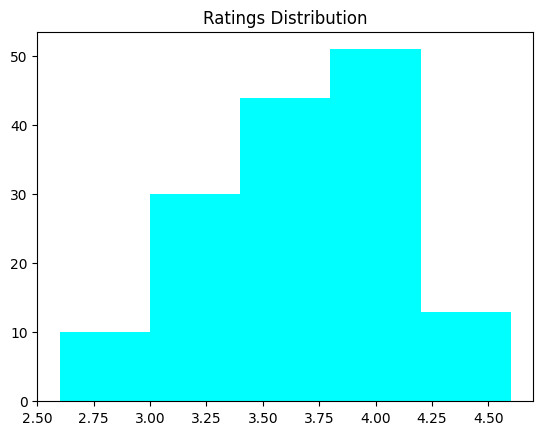

In [32]:
plt.hist(dataframe['rate'],bins=5,color='cyan')
plt.title("Ratings Distribution")
plt.show()

**The majority of restaurants received ratings ranging from 3.5 to 4.**

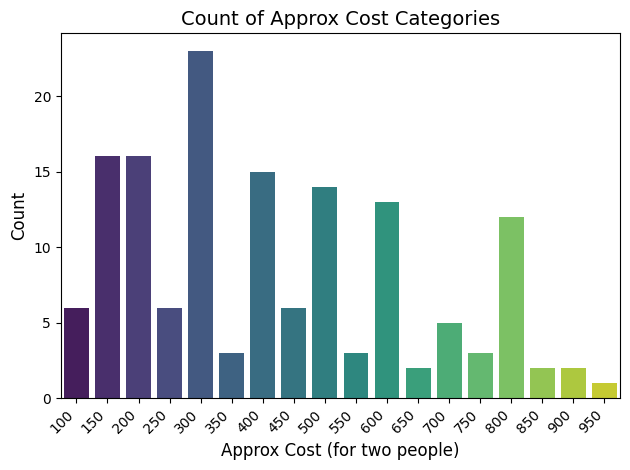

In [ ]:

couple_data = dataframe['approx_cost(for two people)']
unique_categories = couple_data.unique()
palette = sns.color_palette("viridis", len(unique_categories))

sns.countplot(x=couple_data, hue=couple_data, palette=palette, legend=False)


plt.xlabel("Approx Cost (for two people)", size=12)
plt.ylabel("Count", size=12)
plt.title("Count of Approx Cost Categories", size=14)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  

<Axes: xlabel='online_order', ylabel='rate'>

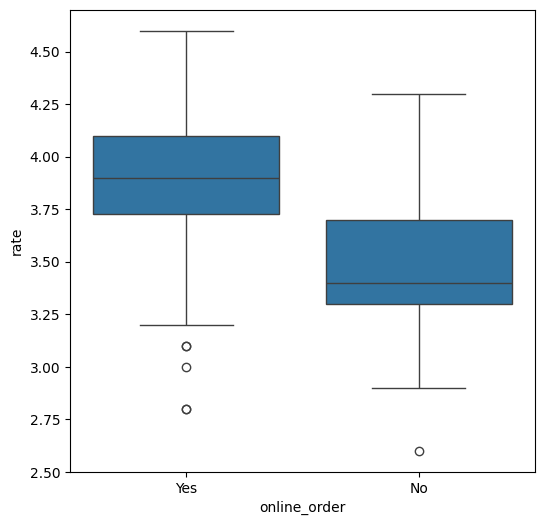

In [43]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


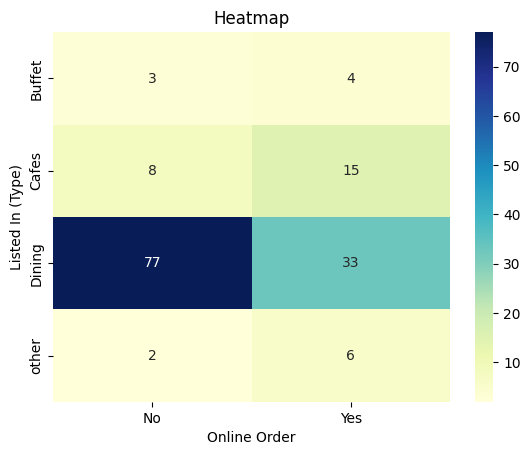

In [44]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()
